In [1]:
"""
READ ME
Dans ce fichier nous retrouvons :
    - les paramètres du dataset
    - la création du modèle LSTM
    - l'entrainement du modèle
Bientot :
    - enregister le modele
    - utiliser le modele à volonté pour generer des notes de musiques
    - ecouter la musique produite
"""

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

2024-01-03 16:31:32.872590: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-03 16:31:32.905717: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-03 16:31:33.079595: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 16:31:33.079668: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 16:31:33.114594: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# ------------------------------
# Paramètres du Dataset
# ------------------------------

dataset = pd.read_csv("./MINI_1_LSTM_16notes.csv")
df = dataset.copy()

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

X_train = np.array([ eval(k) for k in df_train['X']])
X_test = np.array([ eval(k) for k in df_valid['X']])
y_train = np.array([ eval(k) for k in df_train['Y']])
y_test = np.array([ eval(k) for k in df_valid['Y']])

nombreDeNotesPrecedentes = len(X_train[0]) # nombre de notes précédentes à prendre en compte
formatNote = len(X_train[0][0]) # valeur de la note, durée, durée avant prochaine note


In [3]:
print("nombre de données : ", len(dataset))
print("-----------------------------")
print("format du X_train : ", X_train.shape)
print("format du y_train : ", y_train.shape)
print("-----------------------------")
print("format du X_test : ", X_test.shape)
print("format du y_test : ", y_test.shape)
print("-----------------------------")
print("nombreDeNotesPrecedentes : ", nombreDeNotesPrecedentes)
print("formatNote : ", formatNote)

nombre de données :  15608
-----------------------------
format du X_train :  (10926, 15, 3)
format du y_train :  (10926, 3)
-----------------------------
format du X_test :  (4682, 15, 3)
format du y_test :  (4682, 3)
-----------------------------
nombreDeNotesPrecedentes :  15
formatNote :  3


In [4]:
# ------------------------------
# Création du modèle
# ------------------------------
nombreDeNeurones = 20       # nombre de neurones dans la couche LSTM
nombreDeBatch = 32          # nombre de subdivisions du jeu de données
nombreDeEpoch = 20          # nombre de fois que l'on va parcourir le jeu de données
nombreDeEpochPatient = 5    # nombre d'epoch sans amélioration avant d'arrêter l'apprentissage
dropout=False
batchNormalisation=False

# Création d'un modèle séquentiel
model = Sequential()

# Couche d'entrée
model.add( InputLayer(input_shape=(nombreDeNotesPrecedentes, formatNote)) )
# Couche LSTM
model.add( LSTM(nombreDeNeurones, activation='relu') )
# Dropout de 20% qui sert à éviter le surapprentissage
if dropout:
    model.add( Dropout(0.2) ) 
# Batch Normalisation qui sert à normaliser les données d'entrée dans les différents batchs
if batchNormalisation:
    model.add( BatchNormalization() )
# Couche de sortie
model.add( Dense(formatNote) )
# Compilation du modèle avec 
#   - la fonction de perte d'erreur quadratique moyenne
#   - l'optimiseur 'rmsprop' qui est une descente de gradient stochastique 
#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mae'])

# Afficher le résumé du modèle
model.summary()

2024-01-03 16:31:37.252541: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-03 16:31:37.255195: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1920      
                                                                 
 dense (Dense)               (None, 3)                 63        
                                                                 
Total params: 1983 (7.75 KB)
Trainable params: 1983 (7.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
342/342 [==============================] - 10s 19ms/step - loss: 51788.0742 - mae: 82.7831 - val_loss: 47213.9727 - val_mae: 75.1979
Epoch 2/20
342/342 [==============================] - 6s 17ms/step - loss: 44011.3359 - mae: 71.5551 - val_loss: 45367.7617 - val_mae: 74.2321
Epoch 3/20
342/342 [==============================] - 6s 17ms/step - loss: 42955.1055 - mae: 68.7160 - val_loss: 43497.9570 - val_mae: 70.4661
Epoch 4/20
342/342 [==============================] - 6s 17ms/step - loss: 42368.2852 - mae: 68.1663 - val_loss: 43805.9141 - val_mae: 70.0145
Epoch 5/20
342/342 [==============================] - 6s 17ms/step - loss: 41790.8594 - mae: 68.7184 - val_loss: 45810.3828 - val_mae: 73.4599
Epoch 6/20
342/342 [==============================] - 6s 17ms/step - loss: 41739.8711 - mae: 70.0220 - val_loss: 45880.7227 - val_mae: 70.9655
Epoch 7/20
342/342 [==============================] - 7s 20ms/step - loss: 42773.1367 - mae: 68.2558 - val_loss: 45476.5508 - val_mae: 69.990

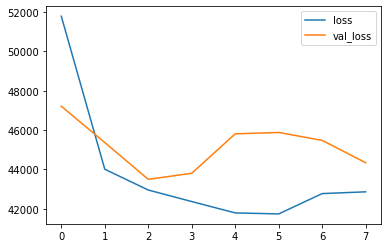

In [5]:
# ------------------------------
# Apprentissage sur nos données
# ------------------------------
# Callback pour arrêter l'apprentissage si la perte ne diminue plus
early_stopping = EarlyStopping(
    min_delta=0.001, # quantité minimale considérable comme une amélioration
    patience=nombreDeEpochPatient,
    restore_best_weights=True,
)

# Entrainement du modèle
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=nombreDeBatch,
    epochs=nombreDeEpoch,
    callbacks=[early_stopping],
)

# Afficher la courbe d'apprentissage
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Erreur minimale atteinte : {}".format(history_df['val_loss'].min()))
